In [28]:
# Import required libraries
%load_ext autoreload
%autoreload 2

import pandas as pd
from plotUtils import PlotUtils
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
datasetToName = {"ddg": "DuckDuckGo", "bing": "Bing", "google": "Google"}
modelToName = {"resnet": "ResNet", "alexnet": "AlexNet", "vgg": "VGG"}
balanceToName = {"20/80": "Strong", "30/70": "Medium",
                 "40/60": "Weak", "50/50": "Original"}

In [30]:
TITLE_PAD = 30
TITLE_DIM = 30
XY_LABEL_PAD = 23
XY_LABEL_DIM = 28
XY_TICKS_DIM = 28
GRID_ALPHA = 0.2
FILL_ALPHA = 0.05
BAR_WIDTH = 0.5
LEGEND_LOC = "upper right"
LEGEND_LABEL_DIM = 25
COLOR_SCHEME = ["#91C483", "#FF6464", "#FFE162", "#C67ACE"]

FIG_SIZE = (18, 8)
FIG_BG_COLOR = None # "w"
FIG_DPI = 500
FIG_BBOX = "tight"
FIG_PAD = .3
FIG_FORMATS = ["png", "pdf"]

In [31]:
plotter = PlotUtils(
    options={
        "titlePad": TITLE_PAD,
        "titleDim": TITLE_DIM,
        "xyLabelPad": XY_LABEL_PAD,
        "xyLabelDim": XY_LABEL_DIM,
        "xyTicksDim": XY_TICKS_DIM,
        "gridAlpha": GRID_ALPHA,
        "fillAlpha": FILL_ALPHA,
        "barWidth": BAR_WIDTH,
        "legendLoc": LEGEND_LOC,
        "legendLabelDim": LEGEND_LABEL_DIM,
        "colorScheme": COLOR_SCHEME,
        "figSize": FIG_SIZE,
        "figBGColor": FIG_BG_COLOR,
        "figDPI": FIG_DPI,
        "figBBox": FIG_BBOX,
        "figPad": FIG_PAD,
        "figFormats": FIG_FORMATS,
    }
)

In [32]:
eps01DF = pd.read_csv("FGSM_Evaluations_0_1.csv", sep=",", index_col=0)
eps02DF = pd.read_csv("FGSM_Evaluations_0_2.csv", sep=",", index_col=0)
eps025DF = pd.read_csv("FGSM_Evaluations_0_25.csv", sep=",", index_col=0)
eps03DF = pd.read_csv("FGSM_Evaluations_0_3.csv", sep=",", index_col=0)

In [33]:
eps01DF = eps01DF.assign(eps=0.1)
eps02DF = eps02DF.assign(eps=0.2)
eps025DF = eps025DF.assign(eps=0.25)
eps03DF = eps03DF.assign(eps=0.3)

In [34]:
allEpsDF = pd.concat([eps01DF, eps02DF, eps025DF, eps03DF], ignore_index=True)

In [35]:
allEpsDF


,dataset,isMath,attack,advModel,advBalancing,model,modelDataset,balancing,acc,precision,recall,f1,eps
0,bing,True,FGSM,alexnet,20/80,alexnet,bing,20/80,0.480,0.481818,0.53,0.504762,0.1
1,bing,True,FGSM,alexnet,20/80,alexnet,bing,30/70,0.505,0.507042,0.36,0.421053,0.1
2,bing,True,FGSM,alexnet,20/80,alexnet,bing,40/60,0.520,0.533333,0.32,0.400000,0.1
3,bing,True,FGSM,alexnet,20/80,alexnet,bing,50/50,0.540,0.547619,0.46,0.500000,0.1
4,bing,True,FGSM,alexnet,20/80,resnet,bing,20/80,0.675,0.610063,0.97,0.749035,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,google,True,FGSM,resnet,50/50,resnet,google,50/50,0.485,0.411765,0.07,0.119658,0.3
5180,google,True,FGSM,resnet,50/50,vgg,google,20/80,0.520,0.510989,0.93,0.659574,0.3
5181,google,True,FGSM,resnet,50/50,vgg,google,30/70,0.595,0.567376,0.80,0.663900,0.3
5182,google,True,FGSM,resnet,50/50,vgg,google,40/60,0.570,0.733333,0.22,0.338462,0.3


In [36]:
allEpsDF["asr"] = allEpsDF.apply(lambda row: 1 - row["acc"], axis=1)
allEpsDF["sameModel"] = allEpsDF.apply(lambda row: row["advModel"] == row["model"], axis=1)

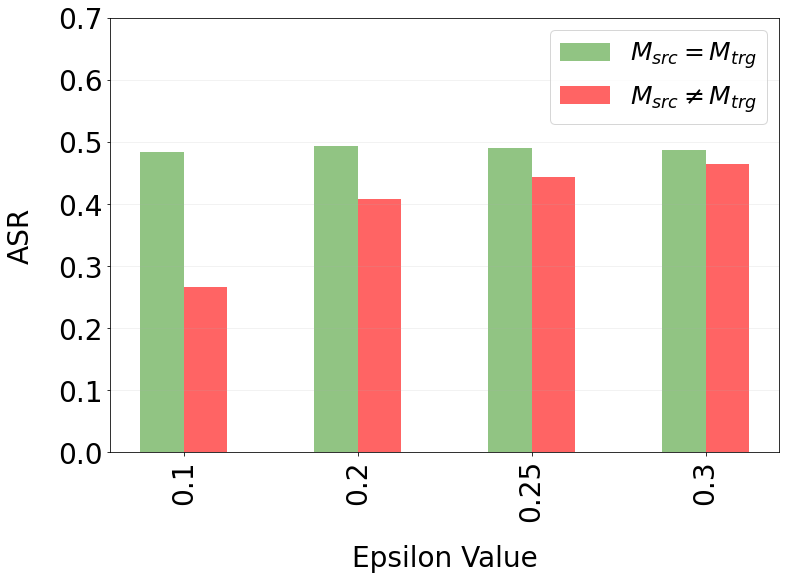

In [37]:
epsMeanDF = allEpsDF.groupby(["sameModel", "eps"]).mean()
epsValuesMean = epsMeanDF.groupby(["sameModel"])["asr"].apply(list)
epsIndex = list(allEpsDF.groupby(["eps"]).mean().index)

plotter.plotResults(
    figSize=(12, 8),
    x=np.arange(len(epsIndex)),
    yArr=list(reversed(list(epsValuesMean))),
    yLabel="ASR",
    xLabel="Epsilon Value",
    legend=[r"$M_{src} = M_{trg}$", r"$M_{src} \neq M_{trg}$"],
    xTicks=epsIndex,
    xTicksRotation=90,
    showGrid=True,
    gridAxis="y",
    style="bar",
    yLim=[0, 0.7],
    saveTitle="eps",
)